In [1]:
import pandas as pd
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 175)

In [2]:
data = pd.read_csv("StoreData_IMMC.csv")

In [3]:
# set the column headings using the first row then delete the first row
data.columns=data.iloc[0]
data = data.drop(data.index[0])

In [4]:
data = data.replace(' ', np.nan)
data = data.dropna(axis=1, how="all")
data = data.dropna()

In [5]:
# Adding a Column showing Price Drop % 
data[["Regular/ Suggested Retail Price (USD)", "Price During Flash Sale   (USD) "]] = data[["Regular/ Suggested Retail Price (USD)", "Price During Flash Sale   (USD) "]].replace('[^.0-9]', '', regex=True).astype(float)
data[["Quantity Available During Flash Sale", "Customer Rating         (1 - 5)"]] = data[["Quantity Available During Flash Sale", "Customer Rating         (1 - 5)"]].apply(pd.to_numeric)

data["Price Drop %"] = data["Price During Flash Sale   (USD) "] - data["Regular/ Suggested Retail Price (USD)"]
data["Price Drop %"] = 100*data["Price Drop %"] / data["Regular/ Suggested Retail Price (USD)"]
data["Price Drop %"] = data["Price Drop %"].round(0)

In [6]:
data.describe(include=np.object)

,Department,Major Product Category,Product Type,Make (Brand),Product (Item)
count,134,134,134,134,134
unique,7,20,31,34,128
top,Computers&Tablets,Laptops,4K LED,Brand BB,Wireless All-in-One Printer
freq,40,20,18,21,3


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

## .describe()
> For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.


# Key Points :
1. There are 7 Departments
2. There are 31 different Products sold
3. 3 rows have the same product (Wireless All-in-One Printer) (but different brands. See below cells)

In [7]:
duplicates = data["Product (Item)  "].value_counts().loc[data["Product (Item)  "].value_counts() > 1]
duplicates

Wireless All-in-One Printer                                         3
App-Controlled Robot Vacuum                                         2
DSLR Camera, Body Only, Black                                       2
App-Controlled Self-Charging Robot Vacuum                           2
Streaming 4K Ultra HD Hi-Res Audio Wi-Fi Built-In Blu-Ray Player    2
Name: Product (Item)  , dtype: int64

In [8]:
data[data["Product (Item)  "].isin(list(duplicates.index))]

,Department,Major Product Category,Product Type,Make (Brand),Product (Item),Regular/ Suggested Retail Price (USD),Price During Flash Sale (USD),Quantity Available During Flash Sale,Customer Rating (1 - 5),Price Drop %
25,Appliances,Vacuum Cleaners & Floor Care,Robot Vacuum,Brand S,App-Controlled Robot Vacuum,299.99,199.99,15,4.5,-33.0
26,Appliances,Vacuum Cleaners & Floor Care,Robot Vacuum,Brand CC,App-Controlled Robot Vacuum,449.99,299.99,15,4.3,-33.0
27,Appliances,Vacuum Cleaners & Floor Care,Robot Vacuum,Brand J,App-Controlled Self-Charging Robot Vacuum,279.99,149.99,10,4.5,-46.0
28,Appliances,Vacuum Cleaners & Floor Care,Robot Vacuum,Brand S,App-Controlled Self-Charging Robot Vacuum,499.99,279.99,10,4.3,-44.0
34,Cameras,DSLR Cameras,Body Only,Brand E,"DSLR Camera, Body Only, Black",2499.99,2199.99,20,4.9,-12.0
35,Cameras,DSLR Cameras,Body Only,Brand AA,"DSLR Camera, Body Only, Black",1499.99,999.99,10,4.9,-33.0
81,Computers&Tablets,Printers,All-In-One,Brand E,Wireless All-in-One Printer,129.99,69.99,12,4.1,-46.0
82,Computers&Tablets,Printers,All-In-One,Brand K,Wireless All-in-One Printer,249.99,149.99,12,4.6,-40.0
83,Computers&Tablets,Printers,All-In-One,Brand P,Wireless All-in-One Printer,69.99,19.99,12,4.1,-71.0
118,TV&Home Theater,Video,Blu-Ray Players,Brand DD,Streaming 4K Ultra HD Hi-Res Audio Wi-Fi Built...,299.99,199.99,10,4.6,-33.0


In [9]:
data.describe().round(2)

,Regular/ Suggested Retail Price (USD),Price During Flash Sale (USD),Quantity Available During Flash Sale,Customer Rating (1 - 5),Price Drop %
count,134.00,134.00,134.00,134.00,134.00
mean,792.45,587.47,11.46,4.58,-29.36
std,686.54,546.82,4.05,0.23,13.06
min,69.99,19.99,5.00,3.70,-71.00
25%,299.99,199.99,8.00,4.50,-40.00
50%,592.00,399.99,11.00,4.60,-30.50
75%,1099.99,799.99,15.00,4.70,-20.00
max,3329.99,2599.99,25.00,5.00,-5.00


## Key Points:
1. The mean, median and mode average price drop is 30% (see graph below)
2. Half of the products experience a price drop of between 20% and 40%
3. Most P

<Figure size 1080x1296 with 0 Axes>

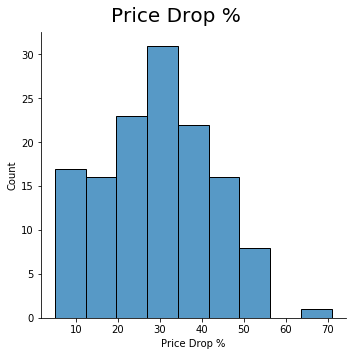

In [10]:
%matplotlib inline
plt.figure(figsize=(15,18));
plot =sns.displot(data=-data["Price Drop %"]);
plot.fig.subplots_adjust(top=0.91);
plot.fig.suptitle("Price Drop %", fontsize=20);


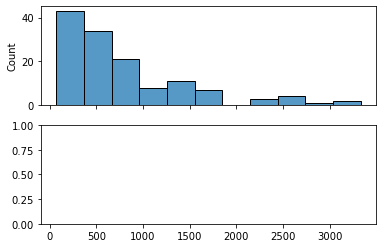

In [11]:
#This was me trying to plot both plots onto the same plot with the same x-axis and the same bin width... work in progress
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

sns.histplot(stat="count",data=data["Regular/ Suggested Retail Price (USD)"], ax=ax1, )

<Figure size 432x288 with 0 Axes>

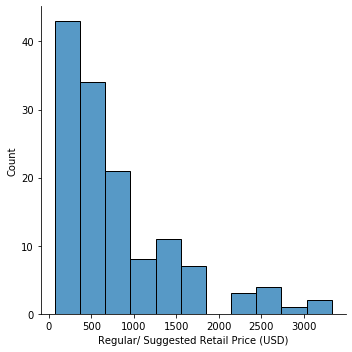

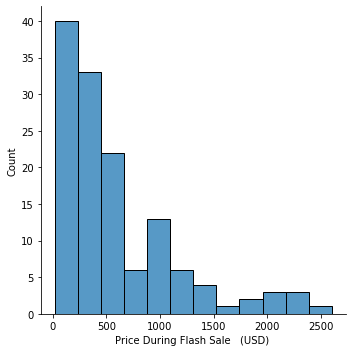

In [12]:
plt.figure()
plot = sns.displot(data=data["Regular/ Suggested Retail Price (USD)"])
plot2 = sns.displot(data=data["Price During Flash Sale   (USD) "])

# Analysing Appliances

In [13]:
data.loc[data["Department"]=="Computers&Tablets"].describe()

,Regular/ Suggested Retail Price (USD),Price During Flash Sale (USD),Quantity Available During Flash Sale,Customer Rating (1 - 5),Price Drop %
count,40.000000,40.000000,40.000000,40.000000,40.00000
mean,553.064250,372.492500,11.100000,4.530000,-37.17500
std,405.336519,307.454057,2.181507,0.228933,11.46877
min,69.990000,19.990000,8.000000,3.700000,-71.00000
25%,249.990000,149.990000,10.000000,4.500000,-43.25000
50%,414.490000,279.990000,11.000000,4.600000,-38.00000
75%,799.990000,499.990000,12.000000,4.625000,-29.50000
max,1599.990000,1099.990000,15.000000,4.800000,-18.00000


In [ ]:
pd.set_options()

In [17]:
for department in data["Department"].value_counts().index:
    print(data.loc[data["Department"]==department].describe().to_markdown() , '\n\n')

|       |   Regular/ Suggested Retail Price (USD) |   Price During Flash Sale   (USD)  |   Quantity Available During Flash Sale |   Customer Rating         (1 - 5) |   Price Drop % |
|:------|----------------------------------------:|-----------------------------------:|---------------------------------------:|----------------------------------:|---------------:|
| count |                                  40     |                             40     |                               40       |                         40        |        40      |
| mean  |                                 553.064 |                            372.493 |                               11.1     |                          4.53     |       -37.175  |
| std   |                                 405.337 |                            307.454 |                                2.18151 |                          0.228933 |        11.4688 |
| min   |                                  69.99  |                             19.99

In [ ]:
mean_price_drops = [-data.loc[data["Department"]==department].describe()["Price Drop %"]["mean"] for department in data["Department"].value_counts().index]
mean_customer_rating = [(data.loc[data["Department"]==department].describe()["Customer Rating         (1 - 5)"]["mean"] - 4) *10 for department in data["Department"].value_counts().index]

mean_price_drop_df = pd.DataFrame({"Price Drop": mean_price_drops}, index=data["Department"].value_counts().index)
mean_customer_rating_df = pd.DataFrame({"Customer Rating": mean_customer_rating}, index=data["Department"].value_counts().index)
mean_df = pd.DataFrame({"Price Drop": mean_price_drops, "Customer Rating":mean_customer_rating},index=data["Department"].value_counts().index)

```Population = go.Bar(x = datasort["country"], y=datasort["population"],showlegend=True, name="Population")
trace1 = go.Bar(x = datasort["country"], y=[0],showlegend=False,hoverinfo='none')
trace2 = go.Bar(x = datasort["country"], y=[0], yaxis='y2',showlegend=False,hoverinfo='none') 
GDPperCapita = go.Bar(x = datasort["country"], y=datasort["gdpPerCapita"], yaxis='y2',showlegend=True, name="GDP per Capita") 
data = [Population,trace1,trace2,GDPperCapita]
layout = go.Layout(barmode='group',
                   legend=dict(x=0.7, y=1.2,orientation="h"),
                   yaxis=dict(title='Population in Billions'),
                   yaxis2=dict(title = 'GDP per Capita in Millions',
                               overlaying = 'y',
                               side='right'))
fig = go.Figure(data=data, layout=layout)
fig.show()```

In [ ]:
data1=pd.read_csv("../random_files/countries.csv")
data1.head()
import plotly.graph_objects as go

Price_drop = go.Bar(x = mean_df.index, y=mean_df["Price Drop"], showlegend=True, name = "PriceDrop")

trace1 = go.Bar(x=mean_df.index, y=[0], showlegend=False, hoverinfo='none')
trace2 = go.Bar(x=mean_df.index, y=[0], yaxis='y2', showlegend=False, hoverinfo='none')

Customer_rating = go.Bar(x=mean_df.index, y=mean_df["Customer Rating"], yaxis='y2', showlegend=True, name="Customer_rating")

data2 = [Price_drop, trace1, trace2, Customer_rating]

layout = go.Layout(barmode='group',
                   legend=dict(x=0.7, y=1.2,orientation="h"),
                   yaxis=dict(title='Price Drop %'),
                   yaxis2=dict(title = 'Customer Rating',
                               overlaying = 'y',
                               side='right'))

fig = go.Figure(data=data2, layout=layout)
fig.show()

### Key Points:

1) Cameras are rated highly but have low price drops

2) Audio equipment are rated comparatively poorly but have high Price Drops

In [ ]:
data